<a href="https://colab.research.google.com/github/zakyzafidaaslam14-cell/project-01/blob/master/UAS_Data_Science_Zaky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Campus Recruitment.csv to Campus Recruitment (1).csv


In [3]:
df = pd.read_csv("Campus Recruitment.csv")
df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [4]:
df.info()

df.describe()

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

(215, 15)

In [5]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,ID,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,Gaji
count,215.000000,213.000000,214.000000,215.000000,209.000000,215.000000,1.480000e+02
mean,108.000000,67.273380,66.330047,66.370186,72.114115,62.278186,5.773108e+06
std,62.209324,10.842297,10.922964,7.358743,13.351612,5.833385,1.869149e+06
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,4.000000e+06
25%,54.500000,60.400000,60.850000,61.000000,60.000000,57.945000,4.800000e+06
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,5.300000e+06
75%,161.500000,75.400000,73.000000,72.000000,84.000000,66.255000,6.000000e+06
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.880000e+07


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [10]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,0
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,0
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Jenis Kelamin,1


In [12]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,0
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,0
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


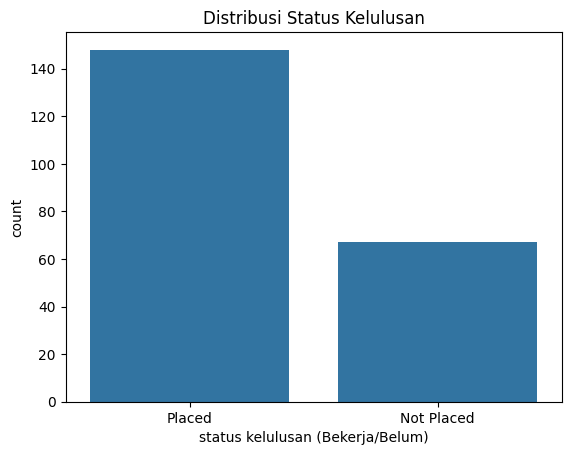

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='status kelulusan (Bekerja/Belum)', data=df)
plt.title("Distribusi Status Kelulusan")
plt.show()

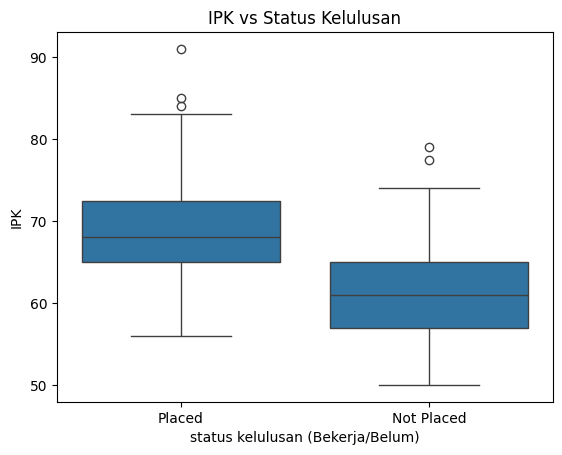

In [14]:
sns.boxplot(
    x='status kelulusan (Bekerja/Belum)',
    y='IPK',
    data=df
)

plt.title("IPK vs Status Kelulusan")
plt.show()

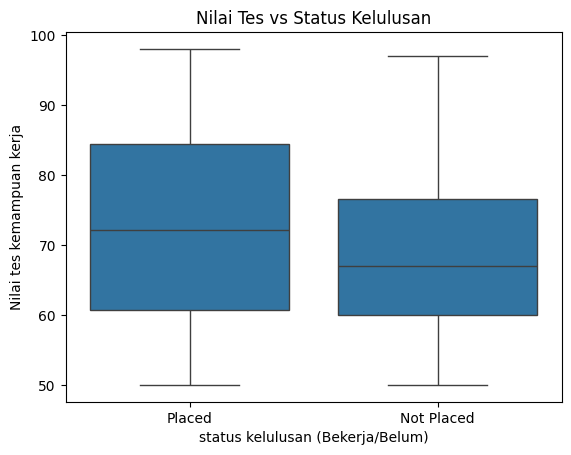

In [15]:
sns.boxplot(
    x='status kelulusan (Bekerja/Belum)',
    y='Nilai tes kemampuan kerja',
    data=df
)

plt.title("Nilai Tes vs Status Kelulusan")
plt.show()

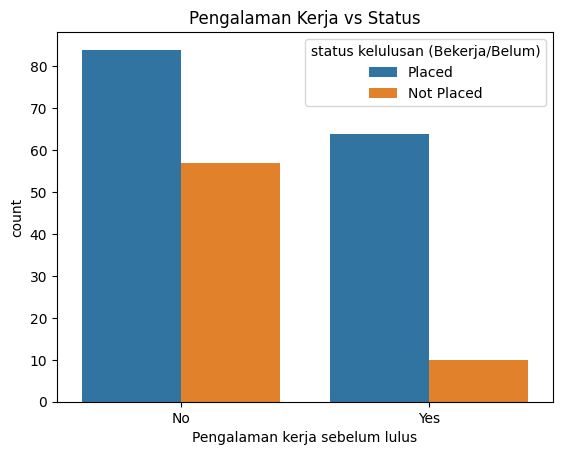

In [16]:
sns.countplot(
    x='Pengalaman kerja sebelum lulus',
    hue='status kelulusan (Bekerja/Belum)',
    data=df
)

plt.title("Pengalaman Kerja vs Status")
plt.show()

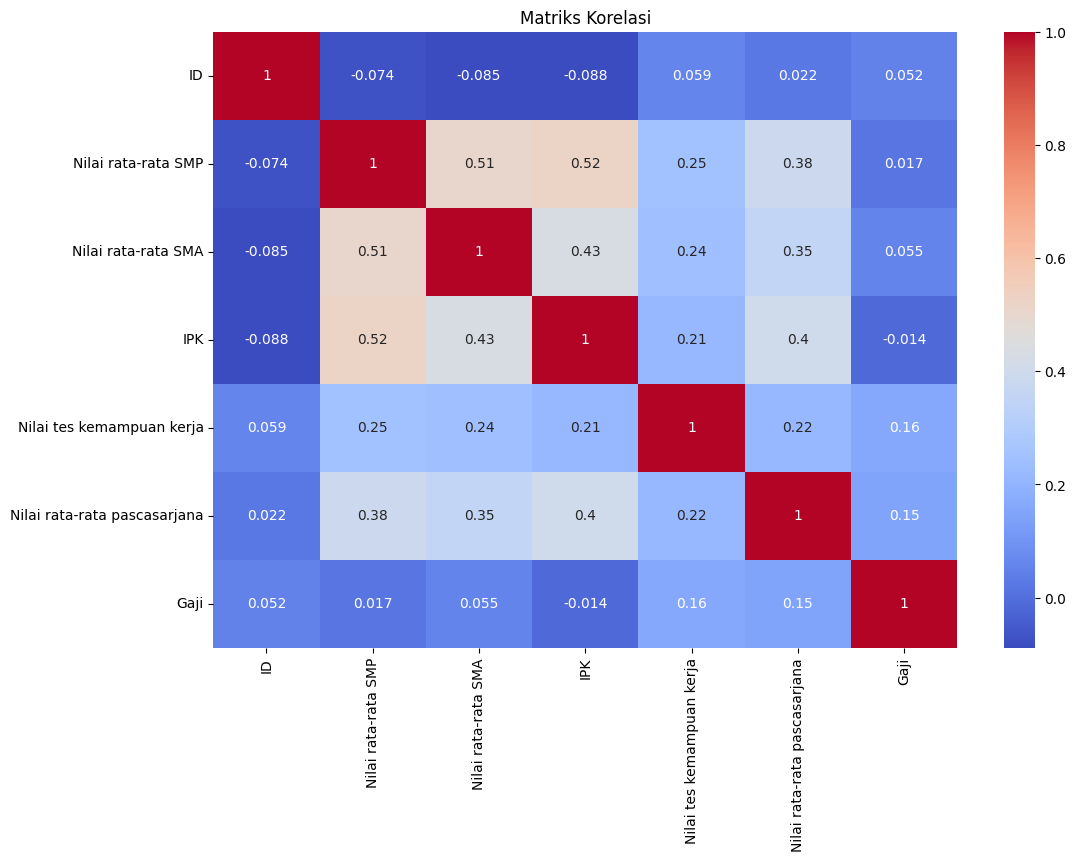

In [17]:
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm"
)

plt.title("Matriks Korelasi")
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,2,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1,5.400000e+06
1,2,2,79.33,1,78.33,1,2,77.48,2,1,86.5,0,66.28,1,4.000000e+06
2,3,2,65.00,1,68.00,2,0,64.00,0,0,75.0,0,57.80,1,5.000000e+06
3,4,2,56.00,1,52.00,2,2,52.00,2,0,66.0,1,59.43,0,5.773108e+06
4,5,2,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50,1,8.500000e+06


In [20]:
df.columns

Index(['ID', 'Jenis Kelamin', 'Nilai rata-rata SMP',
       'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA',
       'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK',
       'Program studi sarjana', 'Pengalaman kerja sebelum lulus',
       'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana',
       'Nilai rata-rata pascasarjana', 'status kelulusan (Bekerja/Belum)',
       'Gaji'],
      dtype='object')

In [21]:
X = df.drop(['status kelulusan (Bekerja/Belum)', 'ID'], axis=1)
y = df['status kelulusan (Bekerja/Belum)']

In [22]:
X.shape, y.shape

((215, 13), (215,))

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [24]:
X_train.shape, X_test.shape

((172, 13), (43, 13))

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred_log = logreg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [30]:
y_pred_rf = rf.predict(X_test)

In [31]:
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



In [32]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

,0
Gaji,0.325150
Nilai rata-rata SMP,0.201329
IPK,0.143499
Nilai rata-rata SMA,0.120327
Nilai rata-rata pascasarjana,0.053071
Nilai tes kemampuan kerja,0.038501
Lembaga pendidikan kelas 12,0.032917
Lembaga pendidikan kelas 10,0.021743
Pengalaman kerja sebelum lulus,0.020273
Pendidikan pascasarjana,0.016099


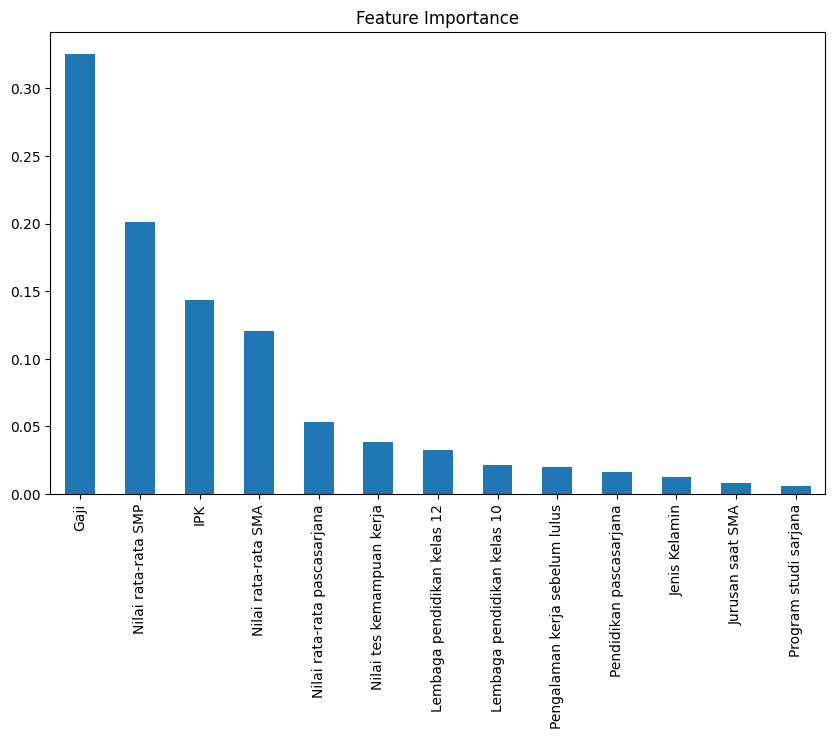

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [34]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_log, acc_rf]
})

,Model,Accuracy
0,Logistic Regression,0.860465
1,Random Forest,0.976744
